In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

PCOS = pd.read_csv("PCOS.csv")

In [15]:
PCOS.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

# Categorical Vars EDA

# Without Smote

In [17]:
cat_vars = PCOS.loc[:, ["PCOS (Y/N)", 'Fast food (Y/N)', "Pregnant(Y/N)",
                    "No. of aborptions", "Reg.Exercise(Y/N)", "Cycle(R/I)", 
                    "hair growth(Y/N)", "Weight gain(Y/N)", "Pimples(Y/N)", "Blood Group",
                       "Skin darkening (Y/N)", "Hair loss(Y/N)"]]

In [19]:
cat_vars.isnull().sum()

PCOS (Y/N)              0
Fast food (Y/N)         1
Pregnant(Y/N)           0
No. of aborptions       0
Reg.Exercise(Y/N)       0
Cycle(R/I)              0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Pimples(Y/N)            0
Blood Group             0
Skin darkening (Y/N)    0
Hair loss(Y/N)          0
dtype: int64

In [21]:
cleaned_cat_vars = cat_vars[~cat_vars['Fast food (Y/N)'].isnull()]
cleaned_cat_vars["PCOS (Y/N)"].value_counts()

0    363
1    177
Name: PCOS (Y/N), dtype: int64

In [37]:
cat = cleaned_cat_vars.rename(columns={"PCOS (Y/N)":"PCOS", 'Fast food (Y/N)': "fast_food", 
                            "Pregnant(Y/N)": "pregnant", "No. of aborptions": "number_abortions", "Reg.Exercise(Y/N)": "regular_excercise", "Cycle(R/I)": "cycle", 
                            "hair growth(Y/N)": "hair_growth", "Pimples(Y/N)": "pimples",
                                      'Weight gain(Y/N)':'weight_gain', 'Skin darkening (Y/N)':'skin_dark',
                                      'Hair loss(Y/N)':'hair_loss', 'Blood Group':'blood_group'})

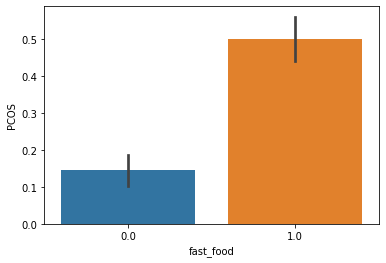

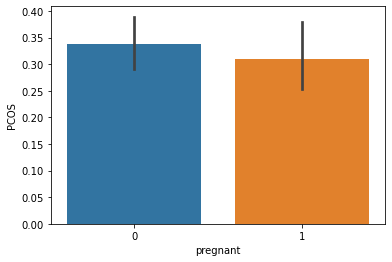

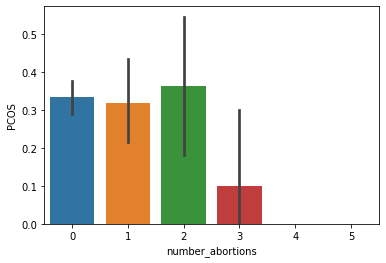

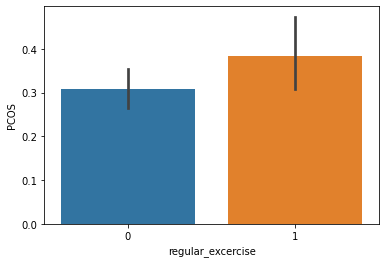

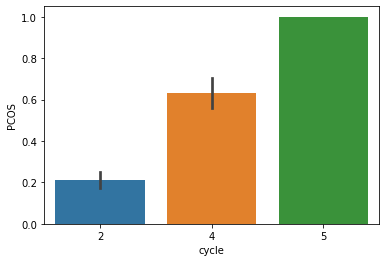

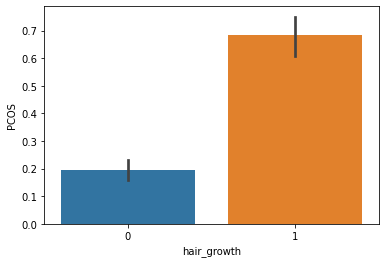

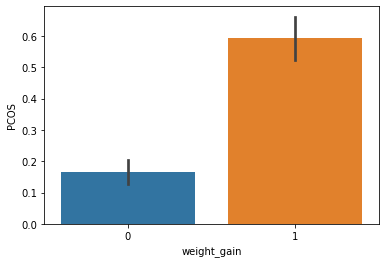

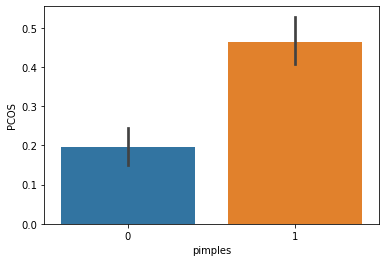

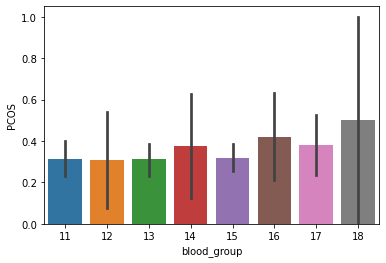

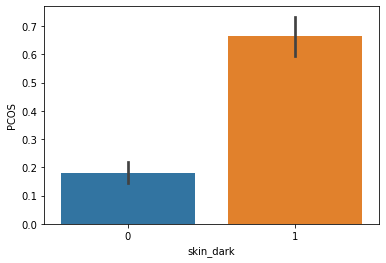

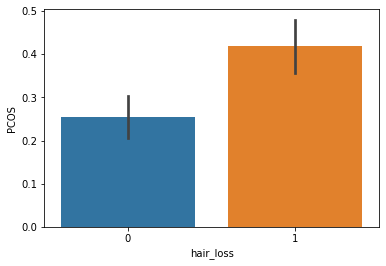

In [38]:
for x in cat.columns:
    if x != "PCOS":
        sns.barplot(x= x, y = "PCOS", data = cat)
        plt.show()

Optimization terminated successfully.
         Current function value: 0.557711
         Iterations 6


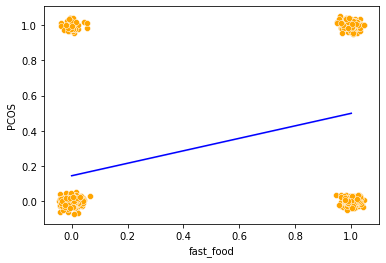

Optimization terminated successfully.
         Current function value: 0.632183
         Iterations 5


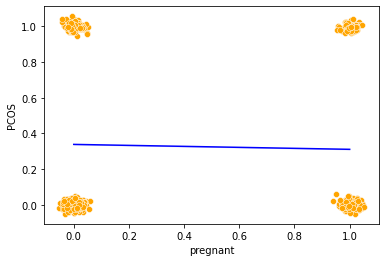

Optimization terminated successfully.
         Current function value: 0.630840
         Iterations 5


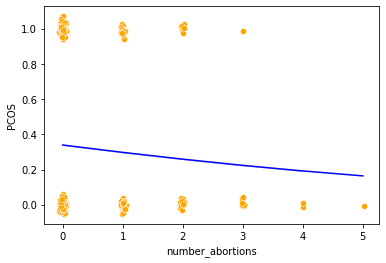

Optimization terminated successfully.
         Current function value: 0.630334
         Iterations 5


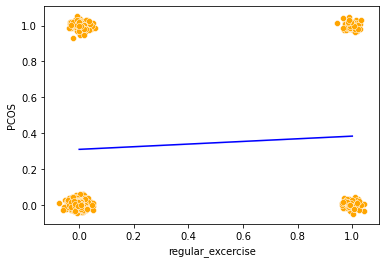

Optimization terminated successfully.
         Current function value: 0.553513
         Iterations 5


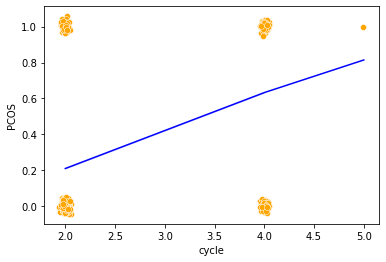

Optimization terminated successfully.
         Current function value: 0.528311
         Iterations 5


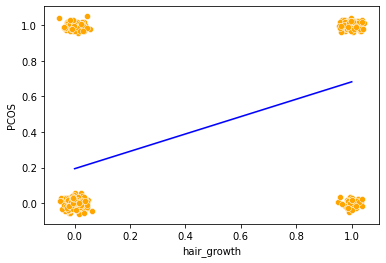

Optimization terminated successfully.
         Current function value: 0.535612
         Iterations 5


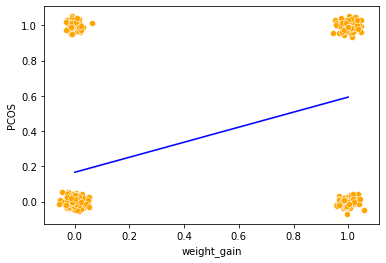

Optimization terminated successfully.
         Current function value: 0.591139
         Iterations 5


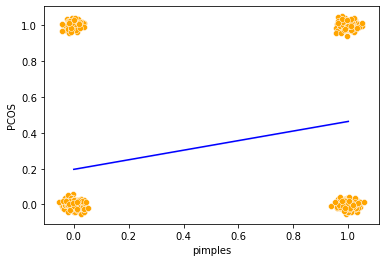

Optimization terminated successfully.
         Current function value: 0.631949
         Iterations 5


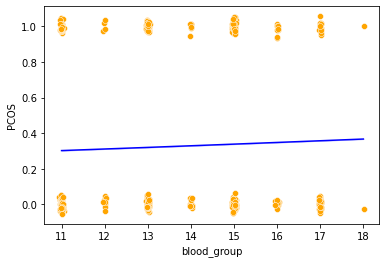

Optimization terminated successfully.
         Current function value: 0.520439
         Iterations 5


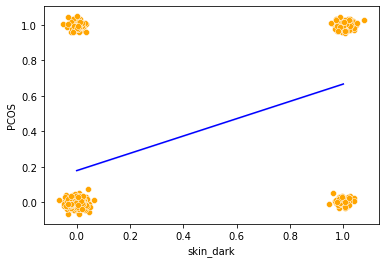

Optimization terminated successfully.
         Current function value: 0.617362
         Iterations 5


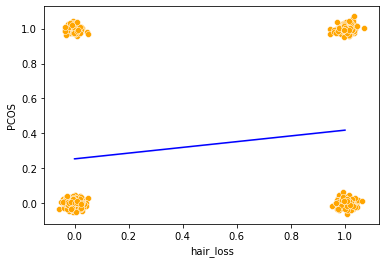

In [39]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)

for x in cat.columns:
    if x != 'PCOS':
        model = smf.logit('PCOS~{}'.format(x), data = cat).fit()
        sns.scatterplot(x = jitter(cat['{}'.format(x)],0), y = jitter(cat.PCOS,0), data = cat, color = 'orange')
        sns.lineplot(x = x, y= model.predict(cat), data = cat, color = 'blue')
        plt.show()


<b>fast food </b>: fastfood = 1 higher chance of PCOS
<br> pregnant: slight decreasing trend, not obvious
<br> <b> abortions </b>: having 4 or 5 times abortions, the observations have no PCOS. Having 3 abortions, mostly no PCOS. Slight overall decreasing trend (no obvious difference for 0, 1, 2
<br> exercise: no obvious difference on its own, slight increasing trend (could result in heterogeneity problem where obs with PCOS exercise more (caution) 
<br> <b> cycle </b>: higher cycle tend to lead to higher chance of PCOS. having cycle = 5, PCOS only equates 1
<br> <b> hair growth </b>: higher hair growth higher chance of PCOS (quite obvious diff)
<br> <b> weight gain </b>: similar to hair growth
<br> <b> pimples </b>: similar to hair growth, with smaller magnitude in effect
<br> <b> skin dark </b>: skin dark leads to higher chance of PCOS (strong in magnitude) 
<br> <b> hair loss </b>: quite interesting that it has similar trend as hair growth, but less in magnitude. 
<br> blood group: no obvious difference on its own. Might be an interaction term (like exercise)

# With Smote

In [41]:
X=cat.iloc[:,1:]
X.isnull().sum()
y=cat.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
y = pd.DataFrame(y_train_res, columns=["PCOS"])
cat_smote = pd.concat([X_train_res, y], axis = 1) 

Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '0': 285 

After OverSampling, the shape of train_X: (570, 11)
After OverSampling, the shape of train_y: (570,) 

After OverSampling, counts of label '1': 285
After OverSampling, counts of label '0': 285


In [43]:
cat_smote.PCOS.value_counts()

1    285
0    285
Name: PCOS, dtype: int64

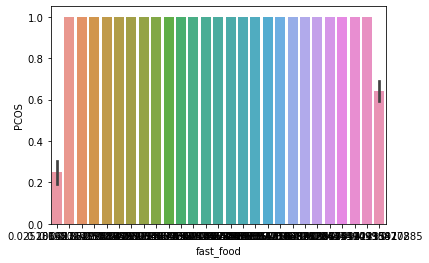

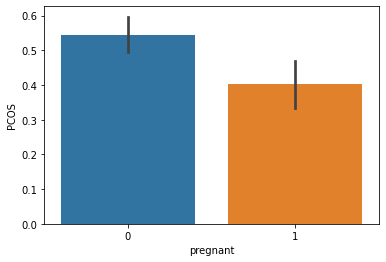

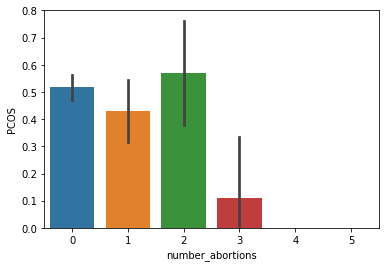

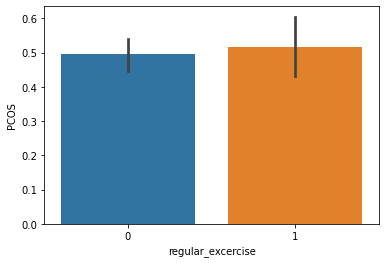

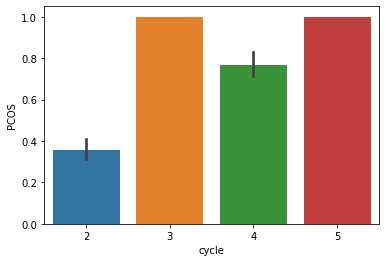

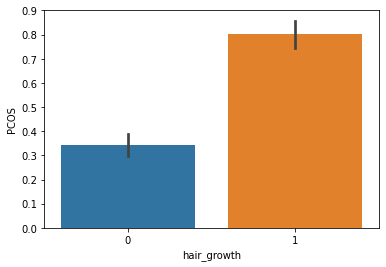

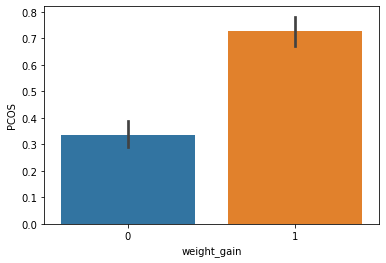

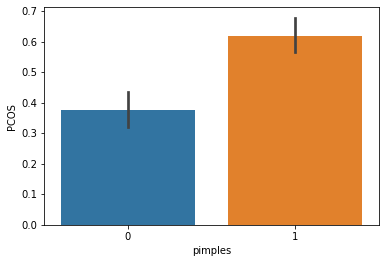

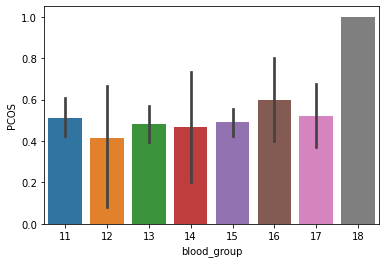

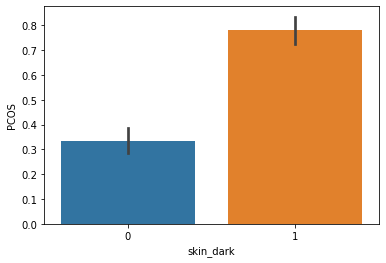

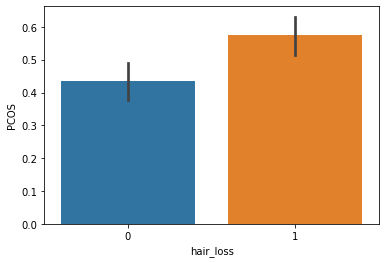

In [45]:
for x in cat_smote.columns:
    if x != "PCOS":
        sns.barplot(x= x, y = "PCOS", data = cat_smote)
        plt.show()

Optimization terminated successfully.
         Current function value: 0.624361
         Iterations 5


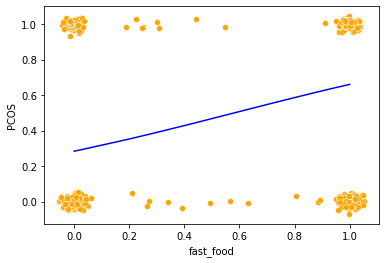

Optimization terminated successfully.
         Current function value: 0.684458
         Iterations 4


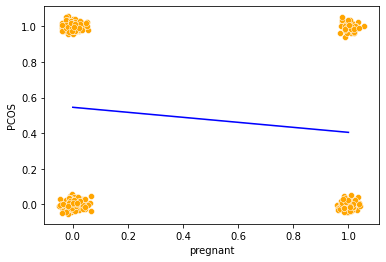

Optimization terminated successfully.
         Current function value: 0.688790
         Iterations 4


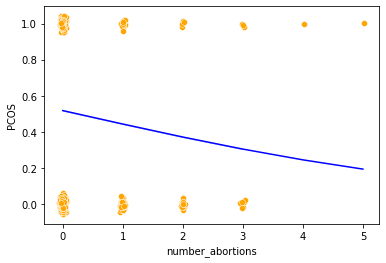

Optimization terminated successfully.
         Current function value: 0.693010
         Iterations 3


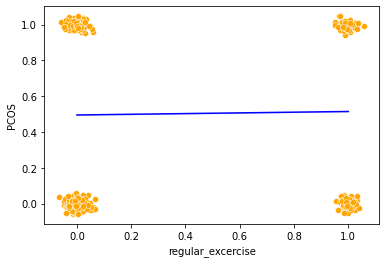

Optimization terminated successfully.
         Current function value: 0.613597
         Iterations 5


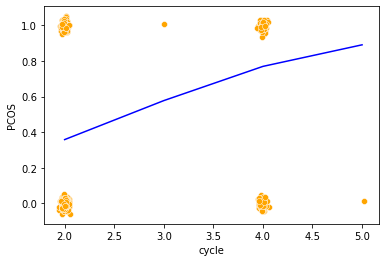

Optimization terminated successfully.
         Current function value: 0.593160
         Iterations 5


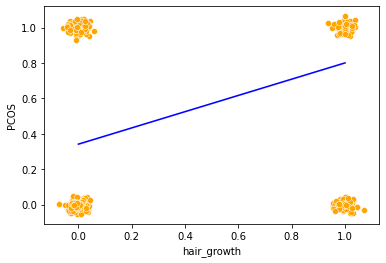

Optimization terminated successfully.
         Current function value: 0.617159
         Iterations 5


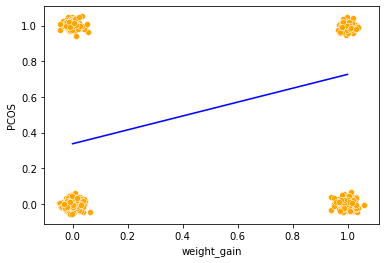

Optimization terminated successfully.
         Current function value: 0.663540
         Iterations 4


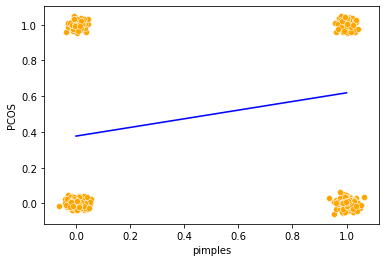

Optimization terminated successfully.
         Current function value: 0.693017
         Iterations 3


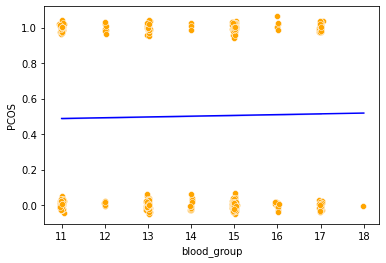

Optimization terminated successfully.
         Current function value: 0.595408
         Iterations 5


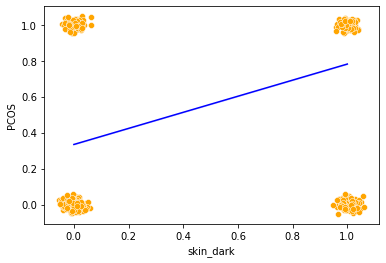

Optimization terminated successfully.
         Current function value: 0.683230
         Iterations 4


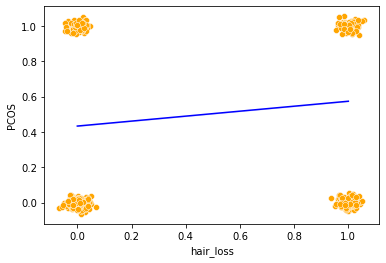

In [46]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)

for x in cat_smote.columns:
    if x != 'PCOS':
        model = smf.logit('PCOS~{}'.format(x), data = cat_smote).fit()
        sns.scatterplot(x = jitter(cat_smote['{}'.format(x)],0), y = jitter(cat.PCOS,0), data = cat_smote, color = 'orange')
        sns.lineplot(x = x, y= model.predict(cat_smote), data = cat_smote, color = 'blue')
        plt.show()

Fast food quite off after smote. Other trends look comparable. 

In [2]:
data = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "Pulse rate(bpm)", 
                    "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", 
                    "No. of aborptions", "Hip(inch)", "Waist(inch)", "Reg.Exercise(Y/N)", "Cycle(R/I)", 
                    "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"]]

data["H/W Ratio"] = data["Hip(inch)"]/data["Waist(inch)"]
data["Height(M)"] = data["Height(Cm)"]/100
data["BMI"] = data["Weight (Kg)"]/np.square(data["Height(M)"])
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", 
                             "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", 
                             "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", 
                             "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])

In [3]:
data.isnull().sum()

PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Pulse rate(bpm)          0
RR (breaths/min)         0
Marraige Status (Yrs)    1
Fast food (Y/N)          1
Pregnant(Y/N)            0
No. of aborptions        0
H/W Ratio                0
Reg.Exercise(Y/N)        0
Cycle(R/I)               0
hair growth(Y/N)         0
Pimples(Y/N)             0
Blood Group              0
dtype: int64

In [4]:
data = data[~((data['Marraige Status (Yrs)'].isnull()) | (data['Fast food (Y/N)'].isnull()))]
data.isnull().sum()

PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Pulse rate(bpm)          0
RR (breaths/min)         0
Marraige Status (Yrs)    0
Fast food (Y/N)          0
Pregnant(Y/N)            0
No. of aborptions        0
H/W Ratio                0
Reg.Exercise(Y/N)        0
Cycle(R/I)               0
hair growth(Y/N)         0
Pimples(Y/N)             0
Blood Group              0
dtype: int64

In [5]:
data["PCOS (Y/N)"].value_counts()

0    363
1    176
Name: PCOS (Y/N), dtype: int64

In [6]:
X=data.iloc[:,1:]
X.isnull().sum()
y=data.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [7]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 144
Before OverSampling, counts of label '0': 287 

After OverSampling, the shape of train_X: (574, 16)
After OverSampling, the shape of train_y: (574,) 

After OverSampling, counts of label '1': 287
After OverSampling, counts of label '0': 287


In [8]:
y = pd.DataFrame(y_train_res, columns=["PCOS (Y/N)"])

In [9]:
data = pd.concat([X_train_res, y], axis = 1) 
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", 
                             "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', 
                             "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)",
                             "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])
data = data.rename(columns={"PCOS (Y/N)":"PCOS", "Age (yrs)":"age", "Weight (Kg)": "weight", "Height(Cm)": 
                            "height", "Pulse rate(bpm)": "pulse_rate", "RR (breaths/min)": "RR", 
                            "Marraige Status (Yrs)": "marriage_years", 'Fast food (Y/N)': "fast_food", 
                            "Pregnant(Y/N)": "pregnant", "No. of aborptions": "number_abortions", "H/W Ratio": 
                            "h/w_ratio", "Reg.Exercise(Y/N)": "regular_excercise", "Cycle(R/I)": "cycle", 
                            "hair growth(Y/N)": "hair_growth", "Pimples(Y/N)": "pimples"})

In [10]:
blood_group_map = {11: "A+", 12: "A-", 13: "B+", 14: "B-", 15: "O+", 16: "O-", 17: "AB+", 18: "AB-"}

data.loc[:, "blood_group_cat"] = data.loc[:, "Blood Group"].map(blood_group_map)
data.drop(columns = 'Blood Group', inplace = True)

In [11]:
# balanced sample size after SMOTE
data["PCOS"].value_counts()

0    287
1    287
Name: PCOS, dtype: int64

In [12]:
data.loc[:, ['weight', 'height', 'BMI', 'marriage_years', 'fast_food', 'h/w_ratio']] = data.loc[:, ['weight', 'height', 'BMI', 'marriage_years', 'fast_food', 'h/w_ratio']].apply(lambda x: round(x, 2))

In [13]:
data.to_csv('cleaned_pcos.csv')

# EDA

### Brief Intro to Predictors

### Categorical Vars

In [14]:
data = pd.read_csv('cleaned_pcos.csv').iloc[:, 1:]
data.columns

Index(['PCOS', 'age', 'weight', 'height', 'BMI', 'pulse_rate', 'RR',
       'marriage_years', 'fast_food', 'pregnant', 'number_abortions',
       'h/w_ratio', 'regular_excercise', 'cycle', 'hair_growth', 'pimples',
       'blood_group_cat'],
      dtype='object')

In [57]:
data['age'].unique()

array([36, 33, 34, 39, 29, 20, 40, 30, 28, 35, 31, 26, 37, 32, 27, 22, 38,
       25, 23, 45, 43, 48, 24, 21, 41, 42, 47, 44])

pregnant: Y - 1, N - 0
<br> regular_excercise: Y - 1, N - 0
<br> hair_growth: Y - 1, N - 0
<br> pimples: Y - 1, N - 0
<br> blood_group_cat: different blood type

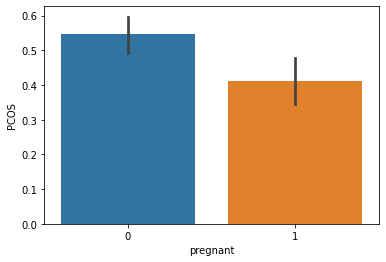

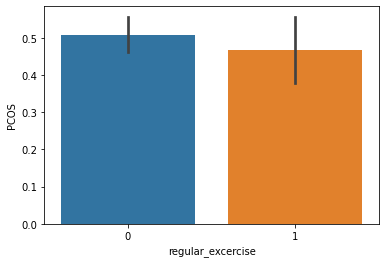

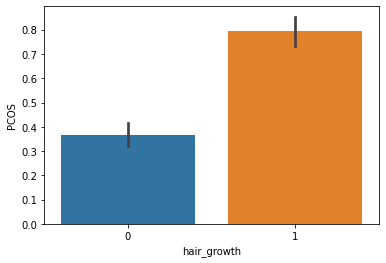

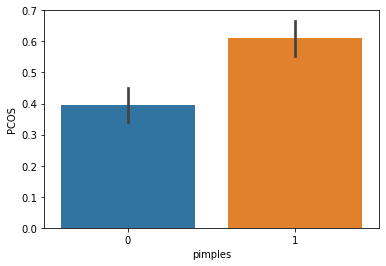

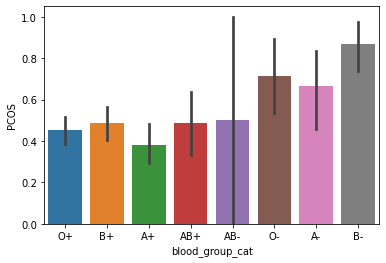

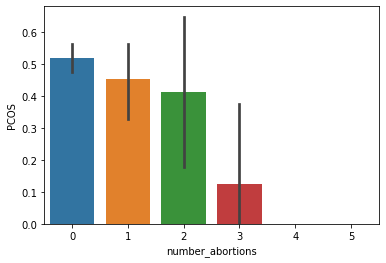

In [68]:
categorical_variables = ['pregnant', 'regular_excercise', 'hair_growth', 'pimples', 'blood_group_cat', 'number_abortions']
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS", data = data)
        plt.show()

### Continuous Vars

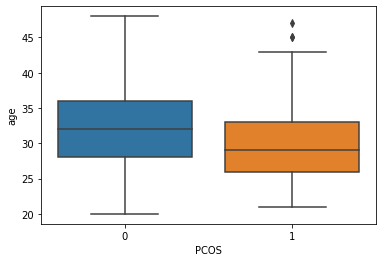

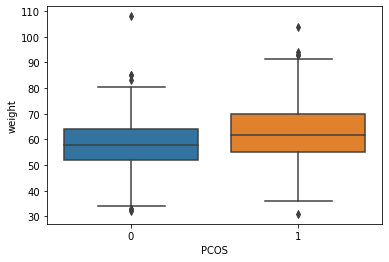

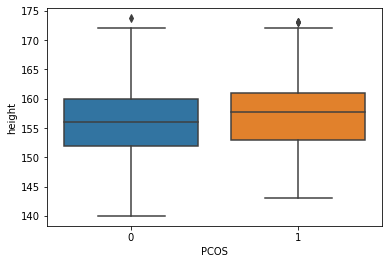

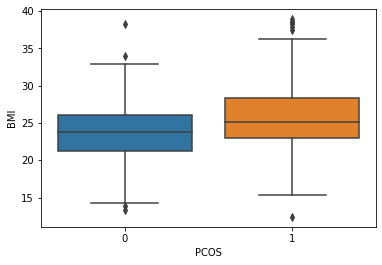

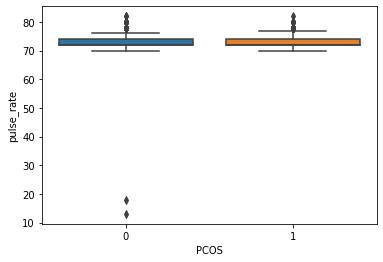

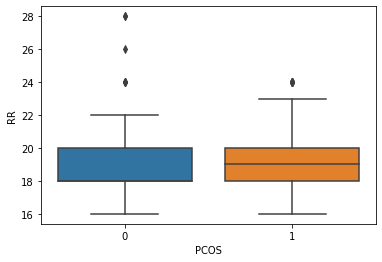

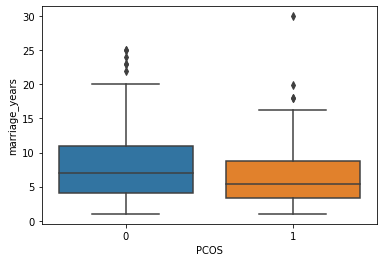

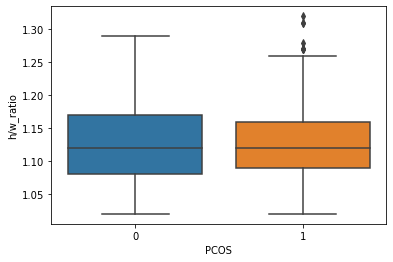

In [69]:
continuous_variables = ['age', 'weight', 'height', 'BMI', 'pulse_rate', 'RR',
       'marriage_years', 'h/w_ratio']
for y in continuous_variables:
    sns.boxplot(y=y, x="PCOS", data=data)
    plt.show()

noticable difference in age, weight, height

# Logit Model Test

In [70]:
model1 = smf.logit("PCOS~pregnant+hair_growth+pimples+number_abortions+age+weight+height", data = data).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.543565
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  574
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            7
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.2158
Time:                        19:07:45   Log-Likelihood:                -312.01
converged:                       True   LL-Null:                       -397.87
Covariance Type:            nonrobust   LLR p-value:                 1.089e-33
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5386      2.907      1.217      0.224      -2.159       9.237
pregnant            -0.5179      0.211     -2.457      0.014      -0.931      -0.105
hair_growth          1.8066      0.231      7.804      0.000       1.353       2.260
pimples              0.8587      0.199      4.311      0.000       0.468       1.249
number_abortions    -0.3142      0.177     -1.775      0.076      -0.661       0.033
age                 -0.0990      0.020     -4.935      0.000      -0.138      -0.060
weight               0.0337      0.010      3.327      0.001       0.014       0.054
height              -0.0206      0.019     -1.088      0.277      -0.058       0.017
====================================================================================
"""

Classification accuracy = 72.6%


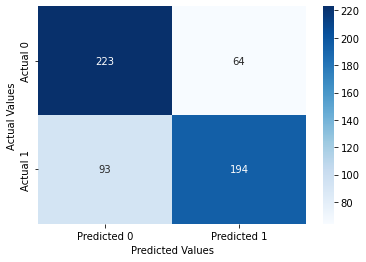

In [71]:
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
confusion_matrix_train(model1)